In [103]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [104]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [105]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [106]:
df.shape

(32560, 15)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [109]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [110]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [111]:
#Checking unique values of each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

There are unique values in every columns

In [112]:
#Checking null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values found

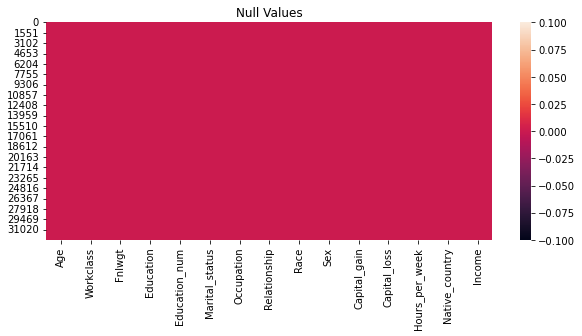

In [113]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [114]:
#Checking unique values of target column
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Only two unique counts in the target column so it's a binary classification problem.

In [115]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

There are '?' entries in Workclass, Occupation and Native_country column. Since they are categorical columns we will replace it by using Mode. 

In [116]:
# let's check the mode of Workclass column 
df["Workclass"].mode()  # we will fill the '?' values with this mode value

0     Private
Name: Workclass, dtype: object

In [117]:
#Replacing '?' with mode value
df['Workclass'] = df.Workclass.str.replace('?', 'Private')

In [118]:
# let's check the mode of Occupation column 
df["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [119]:
#Replacing '?' with mode value
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')

In [120]:
# let's check the mode of Native_country column 
df["Native_country"].mode()

0     United-States
Name: Native_country, dtype: object

In [121]:
#Replacing '?' with mode value
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [122]:
#Checking the value count of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In Capital_gain column there are 92% zero values so dropping this column.

In [123]:
#Droping Capital_gain column
df = df.drop(["Capital_gain"],axis=1)

In [124]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In Capital_loss column there are 95% zero values so let's drop this column also

In [125]:
#Droping Capital_loss column
df = df.drop(["Capital_loss"],axis=1)

In [126]:
#Checking data set
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


# Data Visualization

In [127]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [128]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# UniVariate Analysis

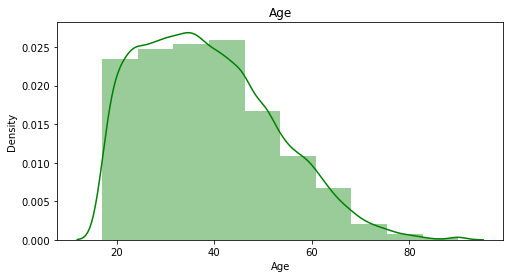

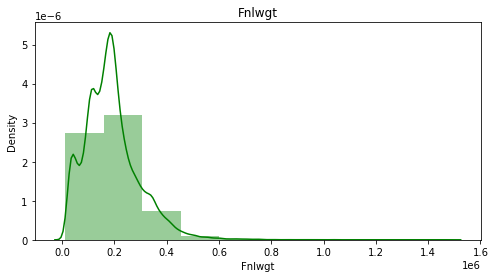

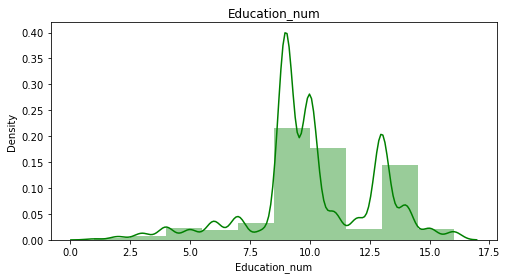

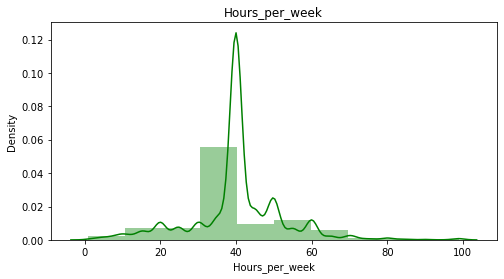

In [129]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

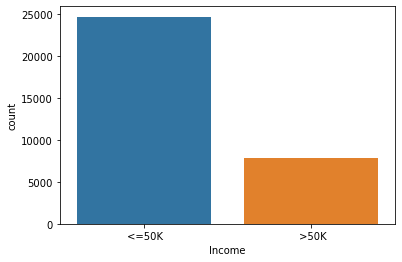

In [130]:
#Count plot for Income
sns.countplot(df['Income']);

From above we can see that the data is imbalance and most of the people are getting income below 50k per year.

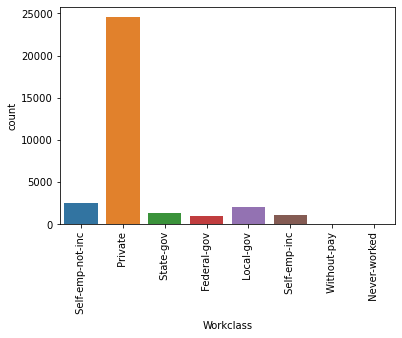

In [131]:
#Count plot for Workclass
sns.countplot(df['Workclass'])
plt.xticks(rotation=90);

We can see that most of the people are working in Private Sector

<AxesSubplot:xlabel='Education_num', ylabel='count'>

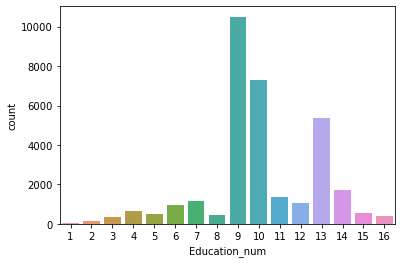

In [132]:
#Count plot for Education_num
sns.countplot(df['Education_num'])

Maximum workers belong to Education number 9,10,13 and very less people belong to 1,2,3.

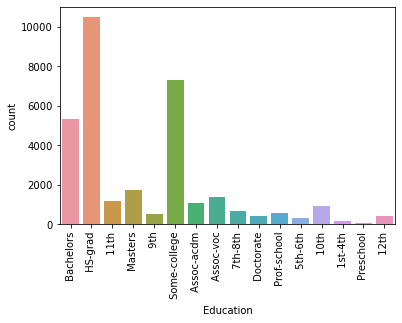

In [133]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90);

Above plot says that HS-grad, Bachelors and Some-college has maximum count

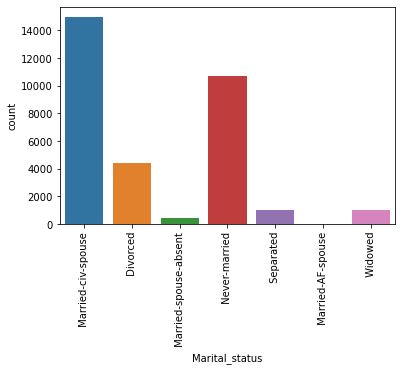

In [134]:
#Count plot for Marital_status
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90);

People who are Married-civ-spouse, Never-married are more in number

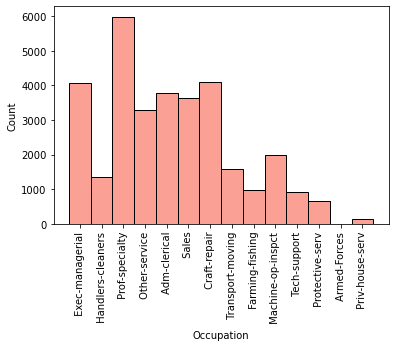

In [135]:
#Hist plot for Occupation
sns.histplot(df['Occupation'],color='salmon')
plt.xticks(rotation=90);

Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation

In [136]:
#Checking the value count of Relationship column
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

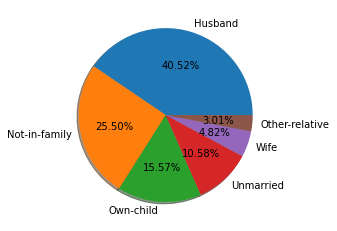

In [137]:
#Ploting pie chart for Relationship
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

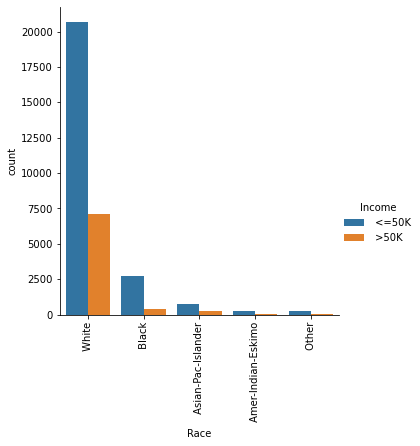

In [138]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

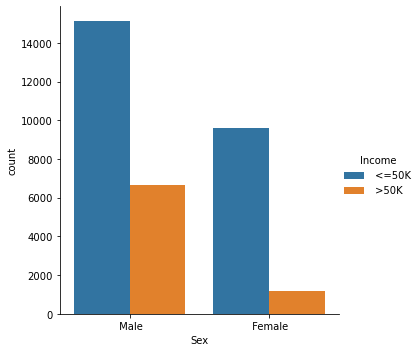

In [139]:
#Factor plot for Sex
sns.factorplot('Sex',kind='count',data=df,hue='Income')
plt.xticks(rotation=0);

In [140]:
#Checking the value count of Sex column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

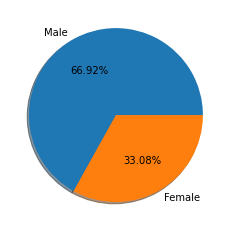

In [141]:
#Ploting pie chart for Sex
labels='Male','Female'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

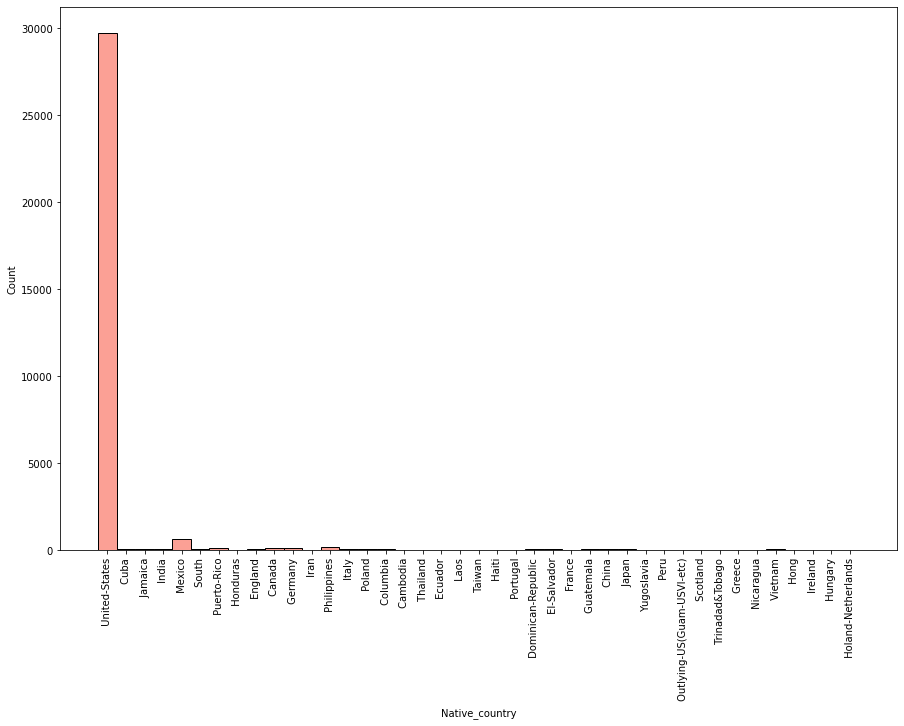

In [142]:
#Hist plot for Native_country
plt.figure(figsize=[15,10])
sns.histplot(df['Native_country'],color='salmon')
plt.xticks(rotation=90);

# Observation-
-  By looking at the pie chart we see most of the count are with Husband.
-  In US white people have more chances of getting job.
-  Irrespective of income males have high count of getting job than women.And men also have high count of getting income >50k per year.
-  We can see that most of the working people about 67% are male rest are female.
-  Most of the people in US are working.

# Bivariate Analysis:

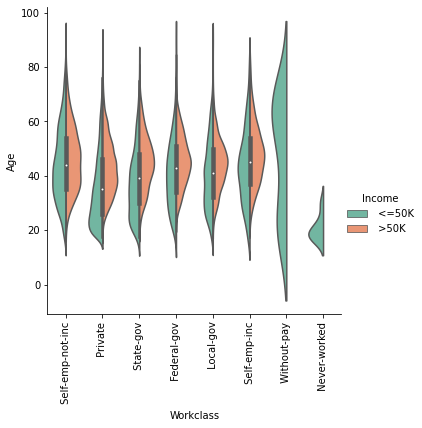

In [143]:
# Let's plot catplot for Workclass and Age
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

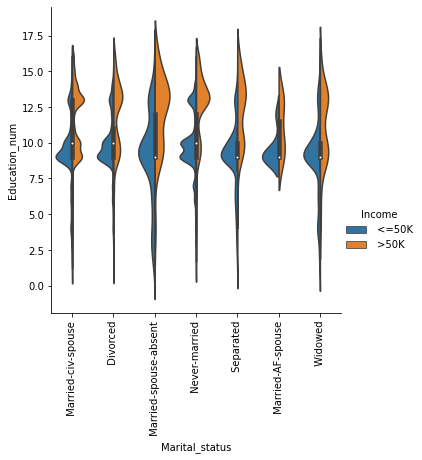

In [144]:
# Let's plot catplot for Marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

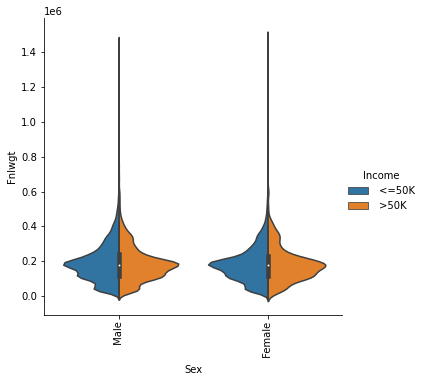

In [145]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

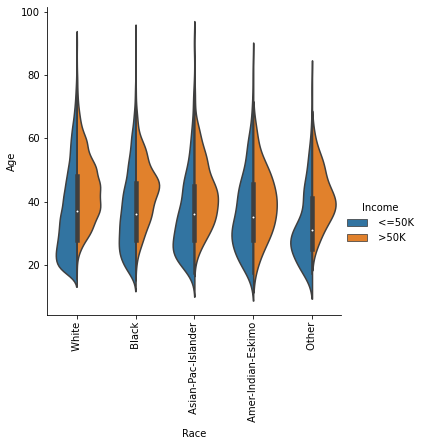

In [146]:
# Let's plot catplot for Race and Age
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

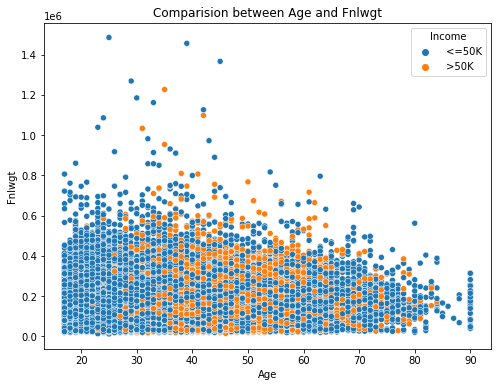

In [147]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"]);

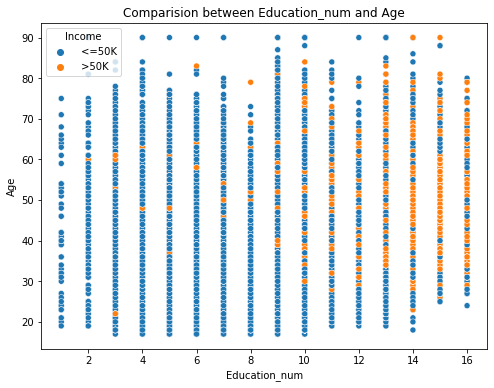

In [148]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"]);

# Observation
-  All the Workclass has chance of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that much  income.
-  If the education number is high then obviously Income is high, but for married-spouse-absent it is showing high education_num.
-  Both for male and female the Fnlwgt is same and they have same income also.
-  Chances of getting income >50k is more in case of Whites.That means in US white people are prefered.
-  As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.
-  People with age above 70 has less chances of getting work and As the education number increases then the chance of getting income>50k is also high.

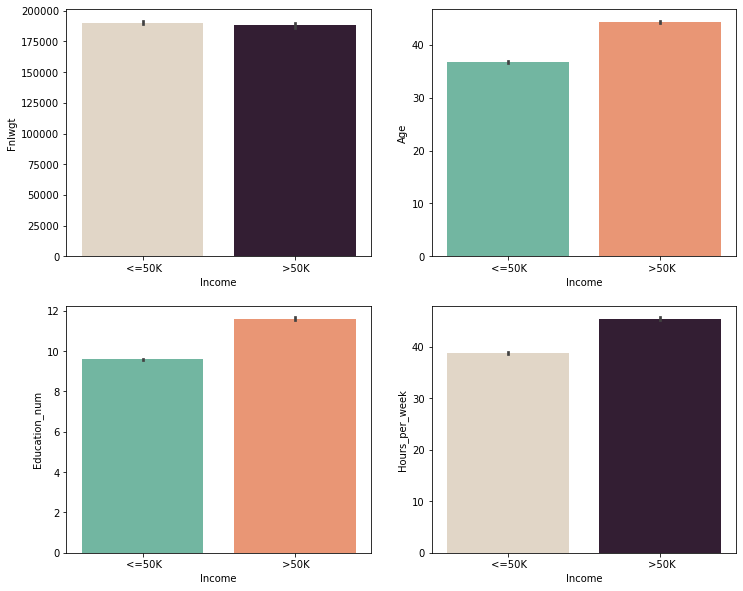

In [149]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

-  With Fnlwgt the chances of getting income >50k and <=50k both are almost equal.
-  With Age the chance of getting >50k is high compared to getting income <=50k.
-  With Education_num the chance of getting income >50k is very high than <=50k.
-  With hours_per_week also the chance of getting income >50k is high

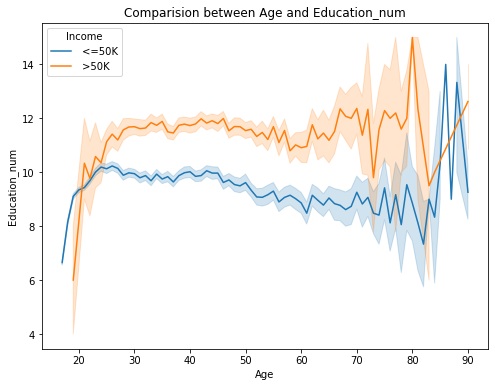

In [150]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'],df['Education_num'],hue=df["Income"]);

We can see as the education number is increasing the chance of getting income >5ok is also increasing.In same way as the age increases means more the experience more is the chance of getting income more than 50k.

# Multivariate Analysis:

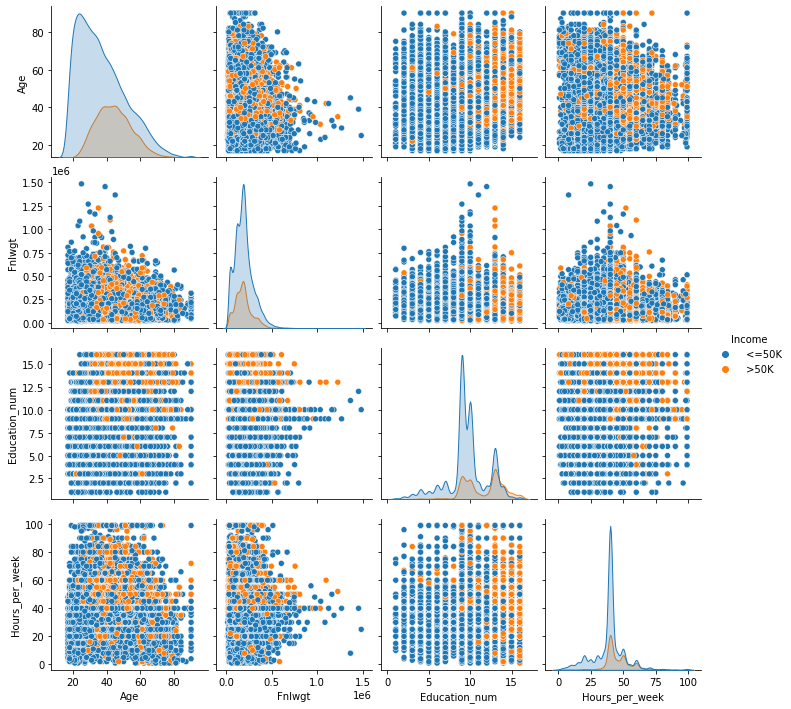

In [151]:
#pair ploting for df
sns.pairplot(df,hue="Income")

We can see outliers and skewness in the dataset from the above plot

# Checking Outliers:

<AxesSubplot:>

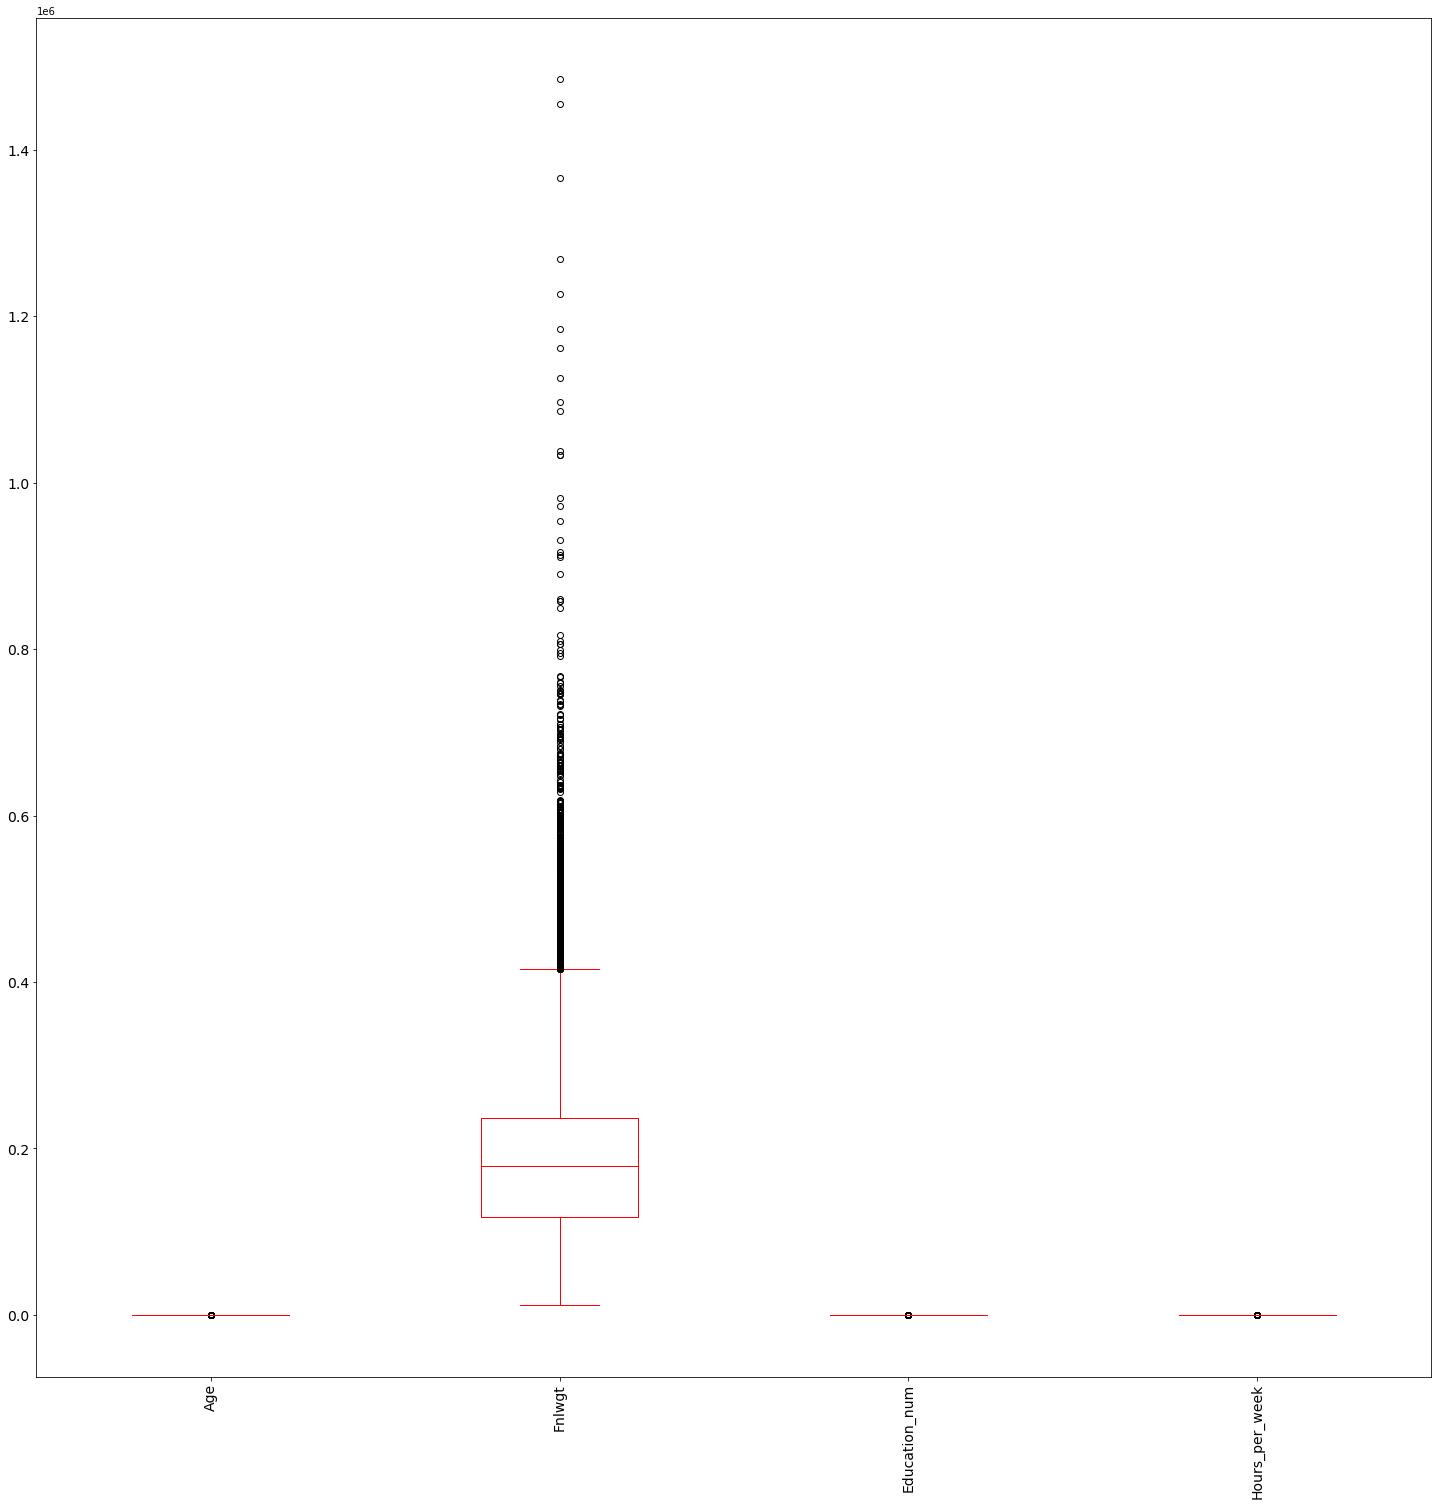

In [152]:
#Using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

There are outliers in all the numerical columns

# Removing Outliers

In [153]:
dfoutliers=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

In [154]:
#Using Zscore method
z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [155]:
#Checking shape of new dataset
df_new.shape

(31461, 13)

In [156]:
#Checking dataloss in zscore method
Dataloss=(((32560-31461)/32560)*100)
Dataloss

3.3753071253071254

# Checking for skewness

In [157]:
df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [158]:
#Removing skewness using yeo-johnson method:

fea=["Fnlwgt"]

In [159]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [160]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [161]:
#Checking skewness again
df_new[fea].skew()

Fnlwgt   -0.034507
dtype: float64

Skewness is removed.

<AxesSubplot:ylabel='Density'>

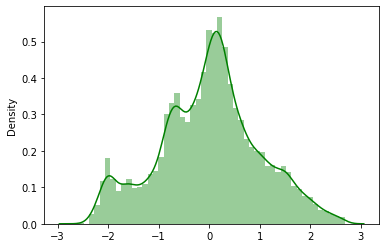

In [162]:
#Checking distplot for skewed columns after removing skewness
sns.distplot(df_new[fea],color='g')

In [163]:
# Label Encoding
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [164]:
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [165]:
df_new[cat_col].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


In [166]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,13,38,0
1,38,3,0.427192,10,9,0,5,1,4,1,40,38,0
2,53,3,0.607320,1,7,2,5,0,2,1,40,38,0
3,28,3,1.487719,8,13,2,9,5,2,0,40,4,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,38,0


# Checking Correlation

In [167]:
cor=df_new.corr()

In [168]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.001992,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001992,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


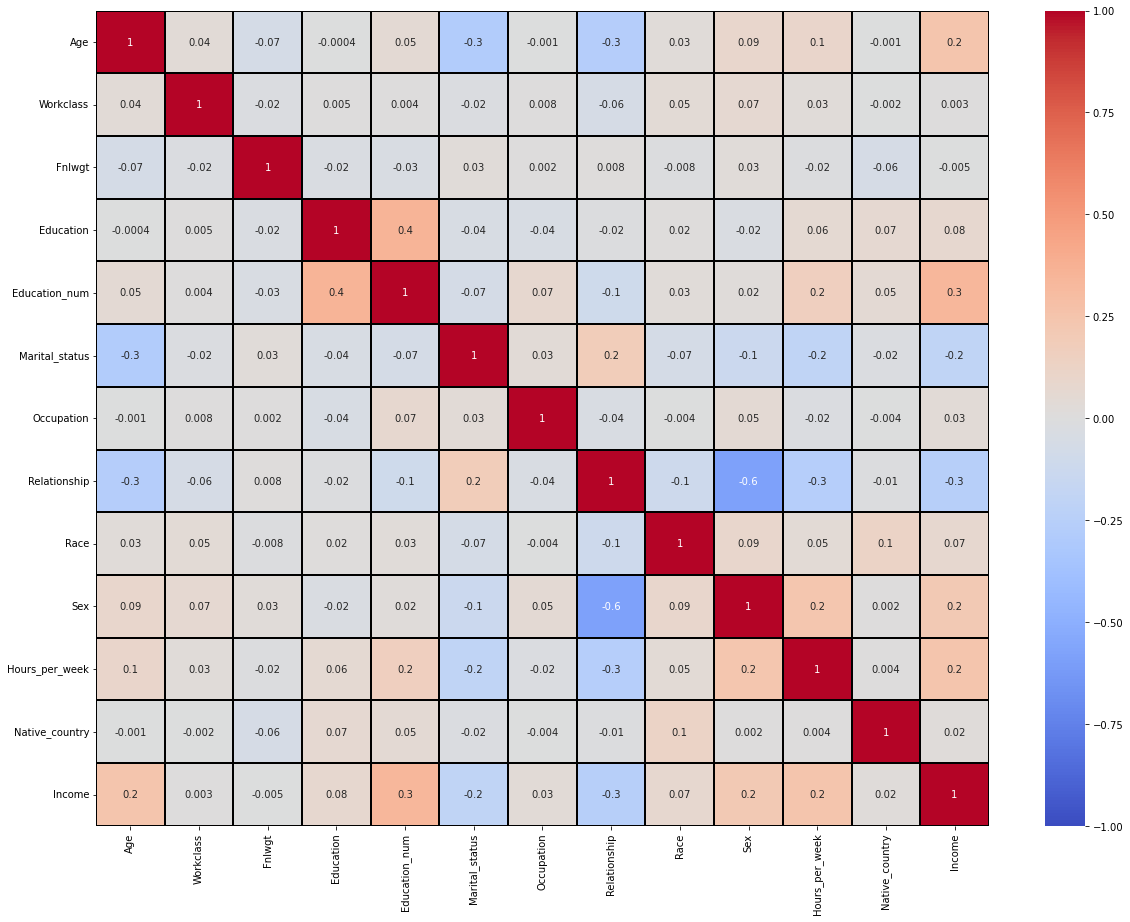

In [169]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

-  By looking into the heat map we can see that there is no multicolinearity issue.
-  Workclass and Fnlwgt has very less correlation with target column.
-  Native_country, Occupation, Race and Education has less correlation with target column.

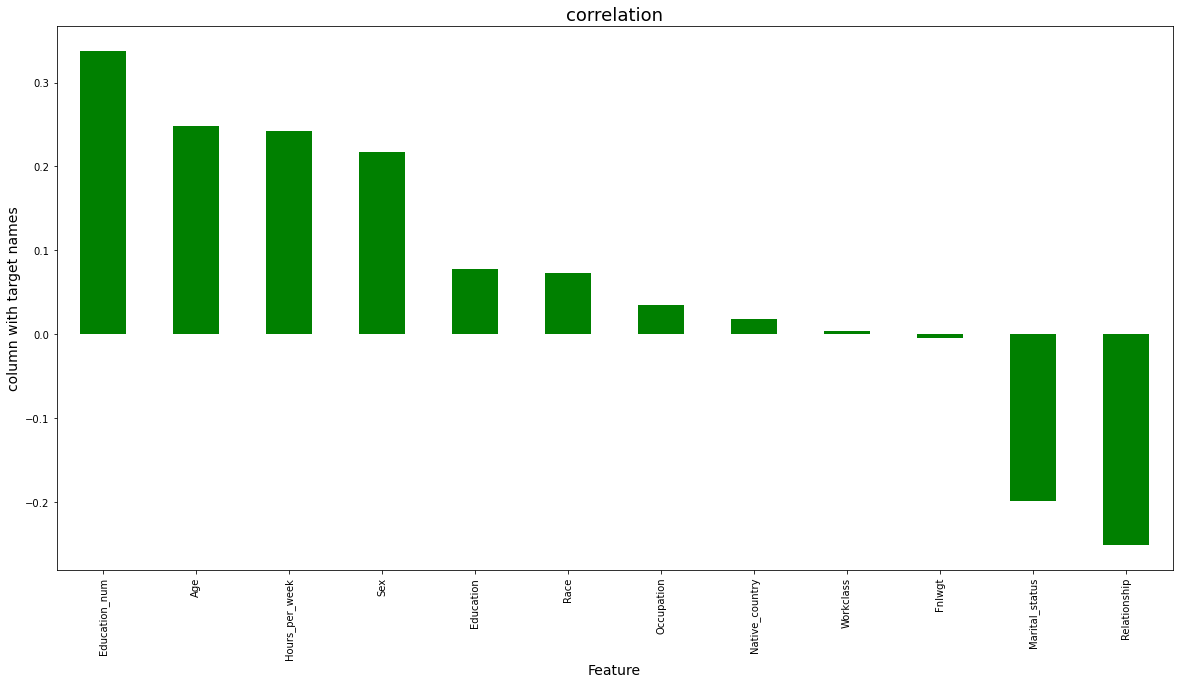

In [170]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Workclass and Fnlwgt are very less correlated to Target column.

In [171]:
#Droping less correlated column
df_new = df_new.drop(["Workclass"],axis=1)

# Separeting and Scaling the data

In [172]:
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

In [173]:
# Using Standard Scaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [174]:
X.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,-1.114171,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.427192,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.607320,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,1.487719,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,1.048962,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062


# Balancing the target variable

In [175]:
#Checking the value count of target column
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [176]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [177]:
import imblearn
from imblearn.over_sampling import SMOTE

In [178]:
# Checking the value counts again
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [179]:
SM = SMOTE()
X, y = SM.fit_resample(X,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

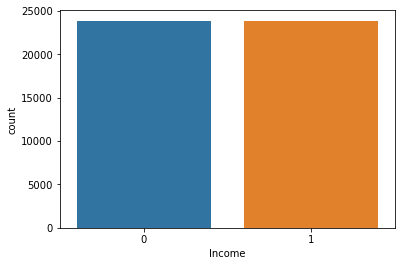

In [180]:
# Visualizing the data after oversampling
sns.countplot(y)

The data is fully balanced now.

# Finding Best Random State and Accuracy:

In [181]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

KeyboardInterrupt: 

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Best Model Selection

In [183]:
#Using Decision Tree Classifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8288848518725545
Confusion Matrix: [[5925 1247]
 [1202 5938]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7172
           1       0.83      0.83      0.83      7140

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



In [184]:
#Using Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.882406372275014
Confusion Matrix: [[6193  979]
 [ 704 6436]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7172
           1       0.87      0.90      0.88      7140

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



In [185]:
#Using SVC
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8167970933482392
Confusion Matrix: [[5403 1769]
 [ 853 6287]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      7172
           1       0.78      0.88      0.83      7140

    accuracy                           0.82     14312
   macro avg       0.82      0.82      0.82     14312
weighted avg       0.82      0.82      0.82     14312



In [186]:
# USing KNN
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8411123532699832
Confusion Matrix: [[5466 1706]
 [ 568 6572]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7172
           1       0.79      0.92      0.85      7140

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



In [187]:
#Using Logistic Regression
LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predlr))
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy Score: 0.75
Confusion Matrix: [[5227 1945]
 [1633 5507]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      7172
           1       0.74      0.77      0.75      7140

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



# Cross Validation Score:

In [188]:
# cv score for Logistic Regression 
print(cross_val_score(LR,X,y,cv=5).mean())

0.7484175752559127


In [189]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.8302536322901322


In [190]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8803310057833558


By looking at the above difference of model accuracy and cross validation score, we found Random Forest Classifier as the best model

# Hyper Parameter tuning

In [192]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [200]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [201]:
GCV.fit(X_train,y_train)

KeyboardInterrupt: 

In [202]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [196]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

88.31749580771381


# ROC-AUC curve

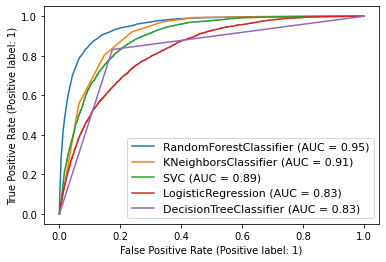

In [198]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the mode

In [199]:
import joblib
joblib.dump(Final_mod,"Censusincome.pkl")

['Censusincome.pkl']